In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [6]:
type(train_labels[0])

numpy.ndarray

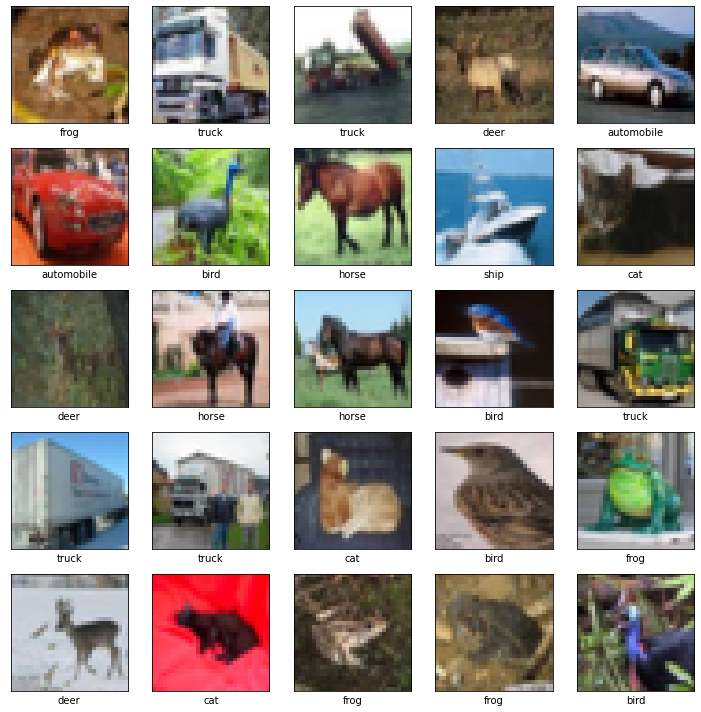

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.tight_layout()
plt.show()

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Softmax())

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [10]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.1253 - accuracy: 0.3252 - val_loss: 2.0310 - val_accuracy: 0.4237
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0000 - accuracy: 0.4562 - val_loss: 1.9641 - val_accuracy: 0.4935
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9500 - accuracy: 0.5080 - val_loss: 1.9396 - val_accuracy: 0.5220
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.9188 - accuracy: 0.5393 - val_loss: 1.9128 - val_accuracy: 0.5443
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8956 - accuracy: 0.5632 - val_loss: 1.8961 - val_accuracy: 0.5631
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8804 - accuracy: 0.5781 - val_loss: 1.8914 - val_accuracy: 0.5659
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8635 - accuracy: 0.5951 - val_loss: 1.8725 - val_ac

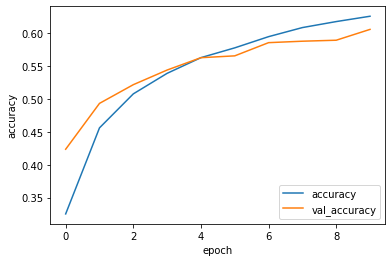

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [27]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1, batch_size=16)

625/625 [==============================] - 2s 3ms/step - loss: 1.8514 - accuracy: 0.6062


10016